In [1]:
import pymc4 as pm
import tensorflow as tf
from tensorflow_probability import bijectors
import numpy as np
import matplotlib.pyplot as plt

# Linear Regression

In [26]:
# Logp calculation for linear regression 
@pm.model(auto_name=True)
def linreg(n_points=100):    
    # Define priors
    sigma = pm.HalfNormal(sigma=1., bijector=bijectors.Identity())
    intercept = pm.Normal(mu=0, sigma=.1)
    x_coeff = pm.Normal(mu=0, sigma=1.)
    x = np.linspace(-5, 5, n_points)
    
    # Define likelihood
    y = pm.Normal(mu=intercept + x_coeff * x, sigma=sigma)
    
model = linreg.configure()

forward_sample = model.forward_sample()

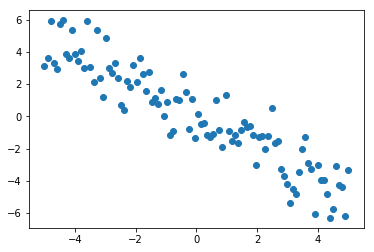

In [27]:
plt.scatter(np.linspace(-5, 5, 100), forward_sample['y'])

In [28]:
log_prob = model.make_log_prob_function()

In [29]:
log_prob(forward_sample['sigma'], 
     forward_sample['intercept'],
     forward_sample['x_coeff'],
     forward_sample['y'])

<tf.Tensor: id=5237, shape=(), dtype=float32, numpy=-5309.3237>

# Centered-Eight 

In [22]:
schools = np.array([28.,  8., -3.,  7., -1.,  1., 18., 12.], dtype='float32')
sigma = np.array([15., 10., 16., 11.,  9., 11., 10., 18.], dtype='float32')
n_points = 8

@pm.model(auto_name=True)
def centered_eight(n_points = n_points):    
    # Define priors
    mu = pm.Normal(mu=0, sigma=5)
    tau = pm.HalfCauchy(beta=.1, bijector=bijectors.Identity())
    theta = pm.Normal(mu=tf.fill([8], mu), 
                      sigma=tf.fill([8], tau))
    
    # Define likelihood
    y = pm.Normal(mu=theta, sigma=theta)
    
model = centered_eight.configure()

forward_sample = model.forward_sample()

forward_sample

{'mu': <tf.Tensor: id=4177, shape=(), dtype=float32, numpy=4.7133865>,
 'tau': <tf.Tensor: id=4205, shape=(), dtype=float32, numpy=0.12147237>,
 'theta': <tf.Tensor: id=4227, shape=(8,), dtype=float32, numpy=
 array([0.70645565, 0.6838048 , 0.59054464, 0.611758  , 0.81999266,
        0.7988661 , 0.71181107, 0.65780187], dtype=float32)>,
 'y': <tf.Tensor: id=4249, shape=(8,), dtype=float32, numpy=
 array([ 2.2448833 ,  0.22619787,  0.31986347,  0.39096758,  1.4634166 ,
        -0.25934392,  0.18226412,  0.62499356], dtype=float32)>}

In [23]:
logp_func = model.make_log_prob_function()
logp_func(forward_sample['mu'], forward_sample['tau'],
          forward_sample['theta'], schools)

<tf.Tensor: id=4496, shape=(), dtype=float32, numpy=-5692.7417>